Calculating probability of flipping exactly 12 heads in 24 coin tosses

general equation: Binomial(k;n,p) = Binomial_Coefficient(n, k) x p^k x (1 - p)^n-k

where:

k = number of outcomes we care about
n = number of total trials
p = probability of event happening

Let's look how we can calculate whole equation using binomial coefficient (binom_c) and other variables, and then using scipy function instead

![alt text](image.png)!



In [9]:
import math
import numpy as np
from scipy.special import binom as binom_c
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import binom 

p = 0.5
n = 24
k = 12

result = binom_c(n, k) * (p**k) * ((1 - p)**(n-k))
print(f"The probability of getting exactly {k} heads in {n} flips is {result}")

# If we need to calculate the probability of interval though, we would use sf function, for instance the probability of 
# getting at least one outcome in 100 trails with probability of 0.00720

p = 0.00720
k = 0
n = 100

result = binom.sf(k=k, n=n, p=p)

print(f"The probability of getting at least one outcome in {n} trials with a probability of {p} is {result}")

The probability of getting exactly 12 heads in 24 flips is 0.1611802577972412
The probability of getting at least one outcome in 100 trials with a probability of 0.0072 is 0.5145138452542949


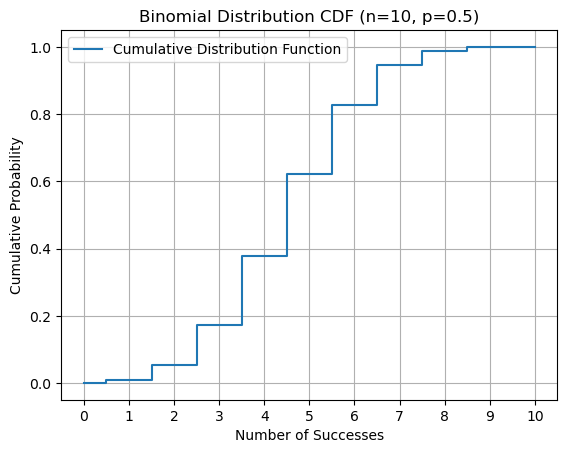

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define the parameters of the binomial distribution
n = 10  # number of trials
p = 0.5  # probability of success on each trial

# Compute the cumulative distribution function (CDF) for each number of successes from 0 to n
x = np.arange(0, n+1)
cdf = binom.cdf(x, n, p)

# Plotting
plt.step(x, cdf, where='mid', label='Cumulative Distribution Function')
plt.xticks(x)
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('Binomial Distribution CDF (n=10, p=0.5)')
plt.legend()
plt.grid(True)
plt.show()


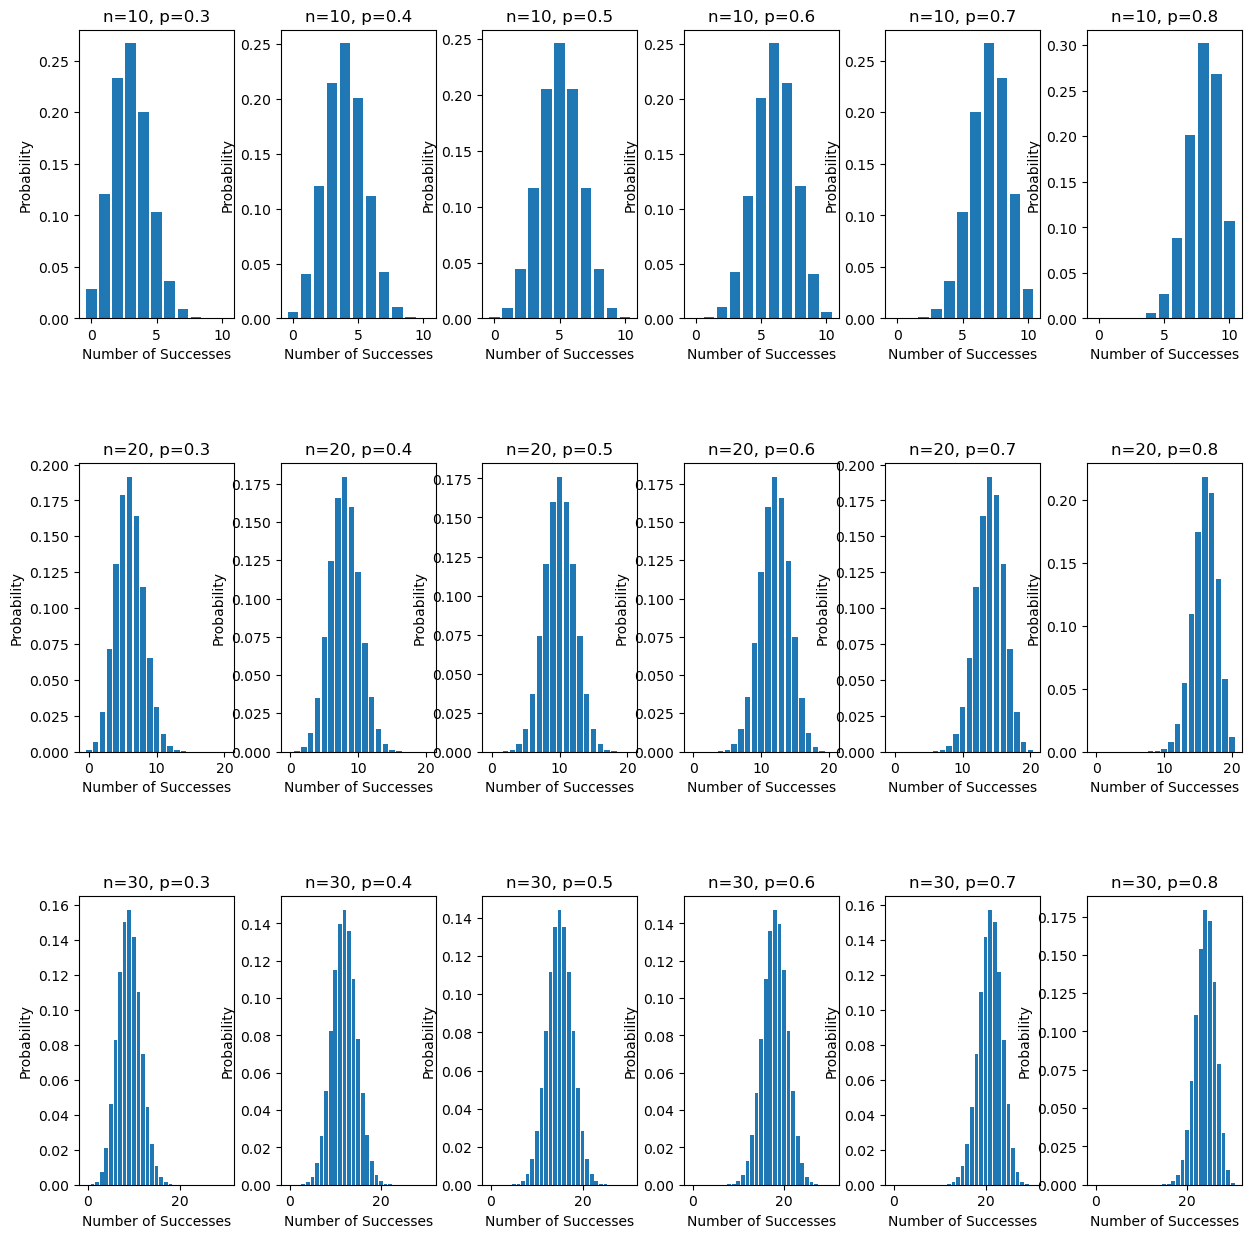

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.special import comb
from scipy.stats import binom

def calculate_binomial_distribution_the_manual_way(n, p):
    probabilities = [0] * (n + 1)  # initialize the list of probabilities with 0s - size n + 1
    probabilities[0] = (1 - p) ** n # calculate the probability of 0 successes
    
    for k in range(1, n + 1):
        # Use the previous probability to calculate the current one - It's derived from the binomial distribution formula and binomial coefficient.
        probabilities[k] = probabilities[k - 1] * p * (n - k + 1) / ((1 - p) * k)
    
    return probabilities

def calculate_binomial_distribution(n, p):
    probabilities = [binom.pmf(k, n, p) for k in range(n + 1)]
    return probabilities

# Define a list of trials and probabilities
n_values = [10, 20, 30]
p_values = [0.3,0.4,0.5,0.6,0.7,0.8]

# Create subplots
fig, axes = plt.subplots(len(n_values), len(p_values), figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        probabilities = calculate_binomial_distribution(n, p)
        axes[i, j].bar(range(n + 1), probabilities)
        axes[i, j].set_xlabel('Number of Successes')
        axes[i, j].set_ylabel('Probability')
        axes[i, j].set_title(f'n={n}, p={p}')

plt.show()

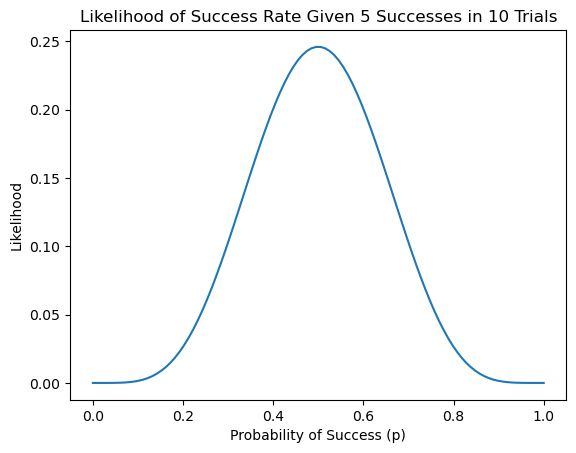

In [12]:
# Execute Binomial distribution formula to calculate likelihood of success rate given fixed number of successes and trials
# This shows a curve that is proportional to the beta distribution but the area under the curve does not 
# necessarily sum to 1 because it is not a probability distribution.
# The Beta distribution is a conjugate prior to the Binomial distribution in Bayesian statistics.
# If you have a beta prior and a binomial likelihood, the posterior distribution is also a beta distribution.
# GitHub Copilot: Yes, you're correct. The likelihood function for the binomial distribution, given the observed data, is indeed proportional 
# to the Beta distribution. 
# The Beta distribution is a conjugate prior distribution for the binomial distribution in Bayesian statistics. 
# This means that if you have a Beta prior for the probability of success `p`, and you observe some data from a binomial distribution, 
# the posterior distribution for `p` is also a Beta distribution.
# However, the likelihood function you're calculating is not normalized like a probability distribution. 
# The area under the curve of the likelihood function does not necessarily add up to 1. On the other hand, the Beta distribution 
# is a probability distribution, and it is normalized so that the total probability is 1.
# So while the shapes of the likelihood function and the Beta distribution might look similar, they are used 
# in different ways. The likelihood function is used to estimate the parameter `p` that maximizes the likelihood of observing 
# the given data, while the Beta distribution can be used to represent a probabilistic statement about `p` before or after observing the data.

def likelihood(p, k, n):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) # Binomial distribution formula

# Fixed number of successes and trials
k = 5
n = 10

# Range of success probabilities
p_values = np.linspace(0, 1, 100)

# Calculate likelihood for each success probability
#likelihood_values_manual = [likelihood(p, k, n) for p in p_values]
# Calculate likelihood for each success probability
likelihood_values = [binom.pmf(k, n, p) for p in p_values]

plt.plot(p_values, likelihood_values)
plt.xlabel('Probability of Success (p)')
plt.ylabel('Likelihood')
plt.title(f'Likelihood of Success Rate Given {k} Successes in {n} Trials')
plt.show()  

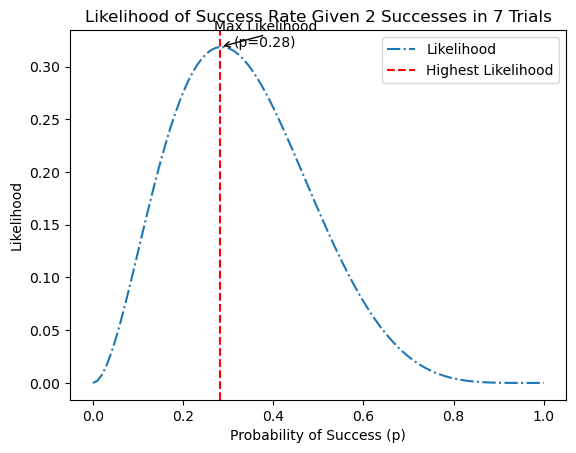

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Given values
k = 2  # Number of successes
n = 7  # Number of trials



# Range of success probabilities
p_values = np.linspace(0, 1, 100)

# Calculate likelihood for each success probability
likelihood_values = [binom.pmf(k, n, p) for p in p_values]

# Plotting
plt.plot(p_values, likelihood_values, '-.', markersize=4, label='Likelihood')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Likelihood')
plt.title(f'Likelihood of Success Rate Given {k} Successes in {n} Trials')

# Find the highest likelihood and its corresponding p value
max_likelihood = max(likelihood_values)
max_p = p_values[np.argmax(likelihood_values)]

# Add a vertical line at the p value with the highest likelihood
plt.axvline(x=max_p, color='r', linestyle='--', label='Highest Likelihood')

# Annotate the highest likelihood
plt.annotate(f'Max Likelihood\n(p={max_p:.2f})', xy=(max_p, max_likelihood), xytext=(max_p+0.1, max_likelihood),
             textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'), ha='center')

plt.legend()
plt.show()


In [14]:
from scipy.stats import binom

p = 1/5  # Probability of success
n = 7  # Number of trials

# Calculate the sum of probabilities for k > 1
result = sum(binom.pmf(k, n, p) for k in range(2, n + 1))

print(f"The probability P(X >= 2) is {result}")


# Calculate the cumulative probability for k > 1
result = 1 - binom.cdf(1, n, p)  # binom.cdf(k, n, p) calculates the cumulative probability for k <= the first argument

print(f"The probability P(X > 1) is {result}")



The probability P(X >= 2) is 0.4232832000000001
The probability P(X > 1) is 0.4232832000000002


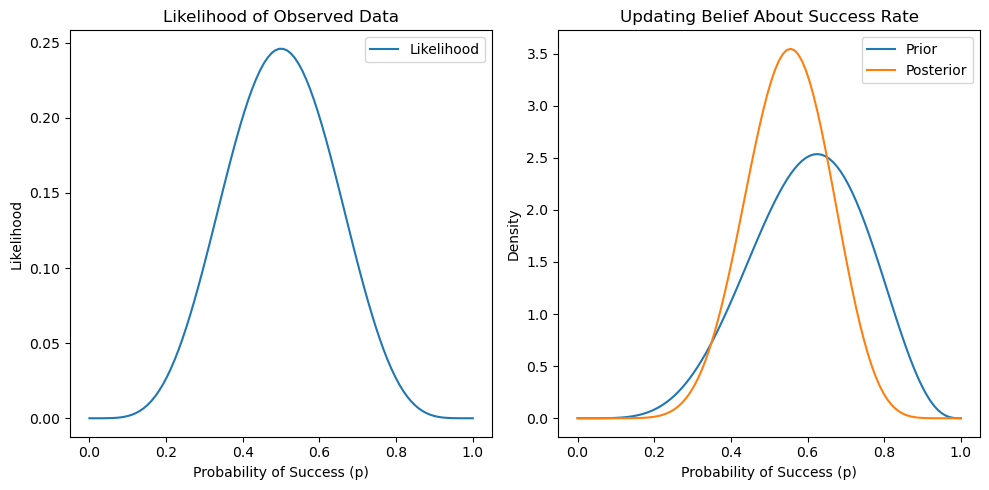

In [15]:
# digging into conjugate priors
from scipy.stats import binom, beta
import numpy as np
import matplotlib.pyplot as plt

# here is bayes in diachronic terms
#      Posterior       Likelihood        Prior       Normalizing constant
# P(belif | data) = P(data | belief) * P(belief) / P(data)

# Prior belief is that my free throw percentage is 60%
alpha_prior = 6
beta_prior = 4

# Observed data I just made 5 out of 10 free throws
n = 10
k = 5

# update with Posterior belief using new data
alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + n - k

# Calculate likelihood for a range of success probabilities
p_values = np.linspace(0, 1, 100)
likelihood = binom.pmf(k, n, p_values)

# Calculate prior and posterior distributions
prior = beta.pdf(p_values, alpha_prior, beta_prior)
posterior = beta.pdf(p_values, alpha_posterior, beta_posterior)

# Plot likelihood
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(p_values, likelihood, label='Likelihood')
plt.title('Likelihood of Observed Data')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Likelihood')
plt.legend()

# Plot prior and posterior
plt.subplot(1, 2, 2)
plt.plot(p_values, prior, label='Prior')
plt.plot(p_values, posterior, label='Posterior')
plt.title('Updating Belief About Success Rate')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

Insert coin into black box and it either eat is or spits out 2 coins (success).  You try it n=41 times and get 2 coins k=14 times.  Figure out what the probability of getting 2 coins is:

p(2 coins) = 1/2 (H1 - guess) v.s. p(2 coins) = 12/41 (H2 - actual data's ratio)

p(D | H1) = B(14:41,1/2)
p(D | H2) = B(14:41,14/41)



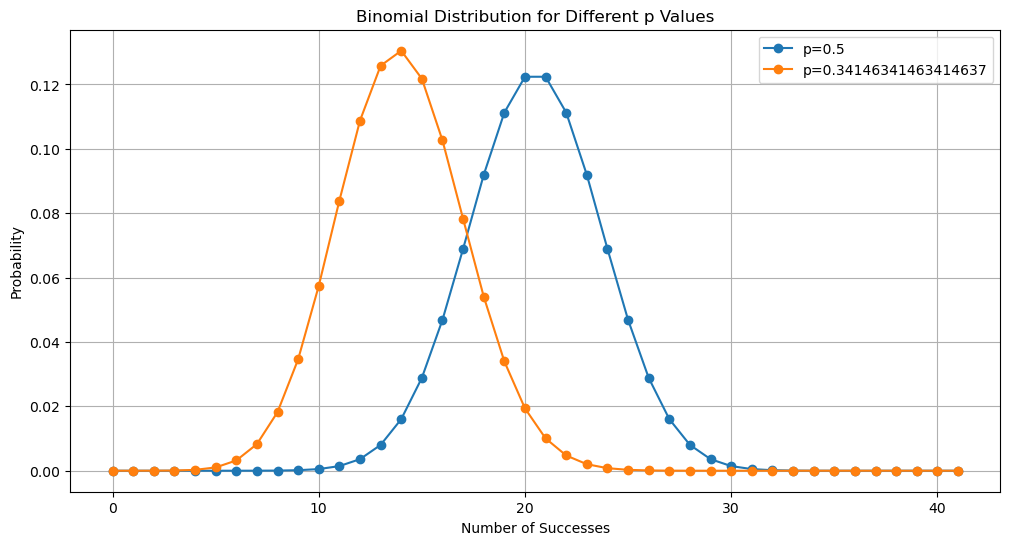

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

n = 41  # number of trials
k = np.arange(0, n+1)  # array from 0 to n

# Calculate binomial distribution for p=1/2
p1 = 1/2
dist1 = binom.pmf(k, n, p1)

# Calculate binomial distribution for p=14/41
p2 = 14/41
dist2 = binom.pmf(k, n, p2)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k, dist1, '-o', label=f'p={p1}')
plt.plot(k, dist2, '-o', label=f'p={p2}')
plt.title('Binomial Distribution for Different p Values')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()